In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
tf.__version__

'2.18.0'

In [7]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')


In [8]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('/content/Boston.csv', header='infer', encoding='latin1')
X = df.drop(columns=['medv', 'Unnamed: 0'],)
y = df['medv']

# # Xem 5 dòng đầu của DataFrame
df.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
n_var = X_train.shape[1]
print(n_var, '\n', X_train.shape)

13 
 (354, 13)


In [11]:
my_model = Sequential()
my_model.add(Dense(input_dim= n_var, units = 1, activation = "linear"))


In [12]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
n_epoch = 2000
bs = 10
lra = 2e-3

In [14]:
my_optimizer = Adam(learning_rate = lra)
my_model.compile(loss = 'mae', optimizer=my_optimizer, metrics =['mse']) # Thay đổi ở đây


In [15]:
my_summary = my_model.fit(X_train, y_train, epochs = n_epoch, batch_size=bs, validation_split = 0.2, verbose = 2)

Epoch 1/2000
29/29 - 2s - 56ms/step - loss: 22.0969 - mse: 574.5070 - val_loss: 21.7860 - val_mse: 543.1072
Epoch 2/2000
29/29 - 0s - 5ms/step - loss: 21.7577 - mse: 560.4517 - val_loss: 21.4485 - val_mse: 529.1111
Epoch 3/2000
29/29 - 0s - 6ms/step - loss: 21.4188 - mse: 546.3279 - val_loss: 21.1096 - val_mse: 515.3163
Epoch 4/2000
29/29 - 0s - 11ms/step - loss: 21.0787 - mse: 532.5820 - val_loss: 20.7701 - val_mse: 501.7431
Epoch 5/2000
29/29 - 0s - 9ms/step - loss: 20.7393 - mse: 519.1072 - val_loss: 20.4321 - val_mse: 488.4477
Epoch 6/2000
29/29 - 0s - 5ms/step - loss: 20.4005 - mse: 506.1747 - val_loss: 20.0965 - val_mse: 475.4738
Epoch 7/2000
29/29 - 0s - 4ms/step - loss: 20.0624 - mse: 493.0536 - val_loss: 19.7564 - val_mse: 462.5916
Epoch 8/2000
29/29 - 0s - 5ms/step - loss: 19.7230 - mse: 480.4893 - val_loss: 19.4207 - val_mse: 450.0947
Epoch 9/2000
29/29 - 0s - 4ms/step - loss: 19.3838 - mse: 467.8513 - val_loss: 19.0803 - val_mse: 437.6836
Epoch 10/2000
29/29 - 0s - 6ms/step

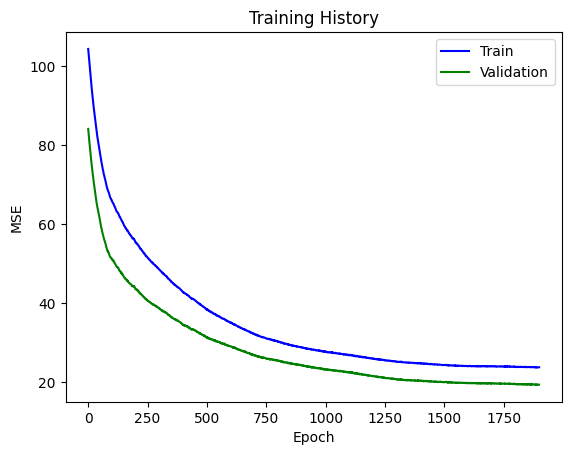

In [17]:
import matplotlib.pyplot as plt

# Bỏ qua n_skip bước đầu tiên để biểu đồ rõ ràng hơn (nếu có các giá trị lớn lúc khởi đầu)
n_skip = 100

# Vẽ biểu đồ MSE của tập huấn luyện
plt.plot(my_summary.history['mse'][n_skip:], c="b")

# Vẽ biểu đồ MSE của tập validation
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")

# Đặt tiêu đề cho biểu đồ
plt.title('Training History')

# Đặt nhãn cho trục y
plt.ylabel('MSE')

# Đặt nhãn cho trục x
plt.xlabel('Epoch')

# Hiển thị chú giải (legend) để phân biệt đường Train và Validation
plt.legend(['Train', 'Validation'], loc='upper right')

# Hiển thị biểu đồ
plt.show()

In [16]:
my_summary.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [20]:
y_pred = my_model.predict(X_test)[:,0]
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
print(np.round(RMSE, 3))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5.648


In [21]:
MSE = my_model.evaluate(X_test, y_test, verbose = 2)[1]
RMSE = np.sqrt(MSE)
print(np.round(RMSE,3))

5/5 - 0s - 8ms/step - loss: 3.5498 - mse: 31.9035
5.648
